In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [2]:
df = pd.read_csv('traffic volume.csv')


In [3]:
df.isnull().sum()


,0
holiday,48143
temp,53
rain,2
snow,12
weather,49
date,0
Time,0
traffic_volume,0


In [4]:
df.isnull().sum()


,0
holiday,48143
temp,53
rain,2
snow,12
weather,49
date,0
Time,0
traffic_volume,0


In [5]:
imputer = SimpleImputer(strategy='mean')
df[['temp', 'rain', 'snow']] = imputer.fit_transform(df[['temp', 'rain', 'snow']])


In [6]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['Time'], format='%d-%m-%Y %H:%M:%S')

df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df.drop(['date', 'Time', 'datetime'], axis=1, inplace=True)


In [7]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['holiday', 'weather']]).toarray()


In [8]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['temp', 'rain', 'snow', 'hour', 'dayofweek', 'month']])


In [9]:
import numpy as np
X = np.hstack((encoded, scaled))
y = df['traffic_volume'].values


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('traffic volume.csv')
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['Time'], format='%d-%m-%Y %H:%M:%S')
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df.drop(['date', 'Time', 'datetime'], axis=1, inplace=True)


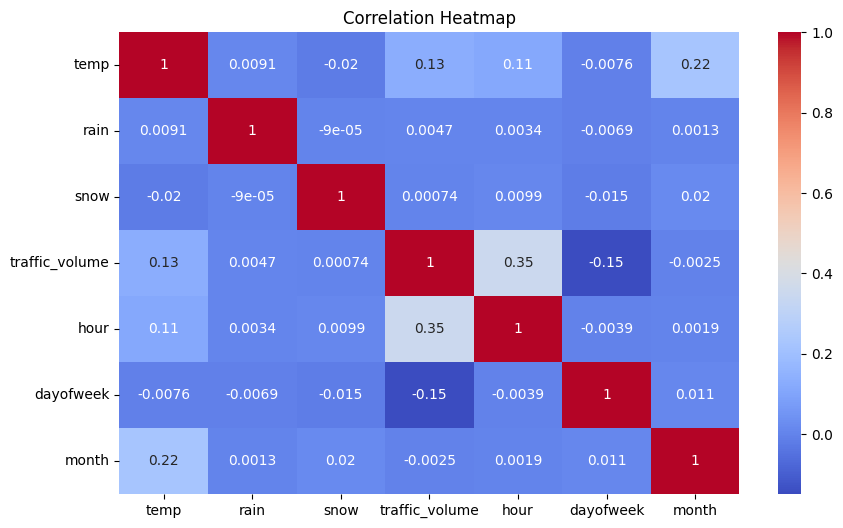

In [12]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [13]:

X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Define transformers
numeric_features = ['temp', 'rain', 'snow', 'hour', 'dayofweek', 'month']
categorical_features = ['holiday', 'weather']

# Impute + scale numerical, encode categorical
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformation
X_processed = preprocessor.fit_transform(X)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


##MODEL BUILDING

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)


In [17]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [18]:
y_pred = rf_model.predict(X_test)


In [19]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.9443031375795982
RMSE: 469.2529177078765


In [20]:
y_train_pred = rf_model.predict(X_train)
print("Train R² Score:", r2_score(y_train, y_train_pred))


Train R² Score: 0.9922032222375731


In [34]:
import pickle
pickle.dump(rf_model, open("Traffic_volume.pkl", 'wb'))


## Evaluation Modules

In [21]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [23]:
lin_reg = LinearRegression()
Dtree = DecisionTreeRegressor()
Rand = RandomForestRegressor(random_state=42)
svr = SVR()
XGB = XGBRegressor()


In [24]:
from sklearn.model_selection import train_test_split


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [26]:
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
test_p1 = lin_reg.predict(x_test)
test_p2 = Dtree.predict(x_test)
test_p3 = Rand.predict(x_test)
test_p4 = svr.predict(x_test)
test_p5 = XGB.predict(x_test)


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)  # Prevents centering for sparse matrix
scaler.fit(X_train)

import pickle
pickle.dump(scaler, open("scale.pkl", 'wb'))


In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'most_frequent' for categorical
imputer.fit(X_train)
pickle.dump(imputer, open("imputer.pkl", 'wb'))


##Save the Model and Encoder

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

# Load your dataset
df = pd.read_csv("traffic volume.csv")

# Identify all categorical columns (object or category dtype)
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize a dictionary to store encoders for each column
encoders = {}

# Loop through and encode each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Save the encoder for this column

# Save the encoders dictionary using pickle
pickle.dump(encoders, open("encoder.pkl", 'wb'))

# (Optional) Save the preprocessed dataframe for verification
df.to_csv("traffic_volume_encoded.csv", index=False)

print("Encoding complete and encoders saved.")


Encoding complete and encoders saved.


In [31]:
import pickle

# Save the trained Random Forest model
pickle.dump(Rand, open("model.pkl", 'wb'))


Traing the model for 11 columns as to get the proper prediction

In [40]:
import pandas as pd

# Load your dataset
data = pd.read_csv("traffic volume.csv")  # Update with correct path if needed


In [42]:
# Assuming you have a 'date_time' or similar column
data = pd.read_csv("traffic volume.csv")

# If your datetime columns are named 'date' and 'Time', combine them
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['Time'], dayfirst=True)

# Extract datetime components
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hours'] = data['datetime'].dt.hour
data['minutes'] = data['datetime'].dt.minute
data['seconds'] = data['datetime'].dt.second

# Now you can drop 'datetime' and the original date/time columns if not needed
data.drop(['datetime', 'date', 'Time'], axis=1, inplace=True)


In [44]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
categorical_columns = ['holiday', 'weather']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Save the encoders for use in Flask
import pickle
for col in categorical_columns:
    pickle.dump(label_encoders[col], open(f'{col}_encoder.pkl', 'wb'))


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature selection
selected_columns = [
    'holiday', 'temp', 'rain', 'snow', 'weather',
    'year', 'month', 'day', 'hours', 'minutes', 'seconds'
]

X = data[selected_columns]
y = data['traffic_volume']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
pickle.dump(scaler, open("scale.pkl", 'wb'))


In [46]:
scaler = StandardScaler()
scaler.fit(X_train)  # only on training data
pickle.dump(scaler, open("scale.pkl", "wb"))


In [49]:
print(df.columns)


Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time',
       'traffic_volume'],
      dtype='object')


In [55]:
# Step 1: Extract year, month, day, hour, minute, second
df['day'] = df['date'] % 100
df['month'] = df['date'] // 100
df['year'] = 2012  # or use actual year if available

df['hours'] = df['Time']
df['minutes'] = 0
df['seconds'] = 0

# Step 2: Drop original 'date' and 'Time' columns
df.drop(['date', 'Time'], axis=1, inplace=True)

# Optional: Reorder columns
df = df[['holiday', 'temp', 'rain', 'snow', 'weather',
         'year', 'month', 'day', 'hours', 'minutes', 'seconds',
         'traffic_volume']]


In [56]:
features = ['holiday', 'temp', 'rain', 'snow', 'weather',
            'year', 'month', 'day', 'hours', 'minutes', 'seconds']
X = df[features]
y = df['traffic_volume']


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pickle

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save new model and scaler
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scale.pkl", "wb"))
